# Cars

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('carData.csv', sep=',')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

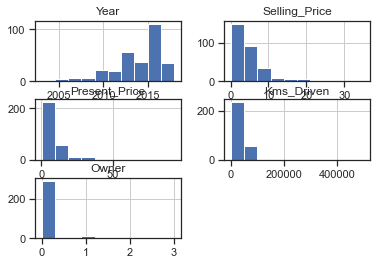

In [7]:
df.hist()

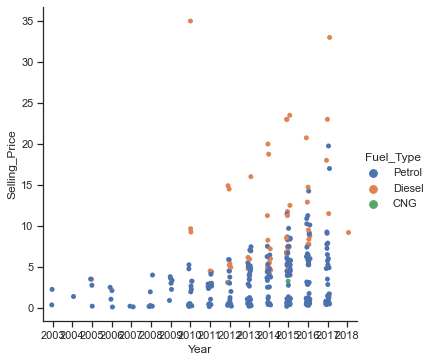

In [7]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Fuel_Type", data=df)
plt.rcParams["xtick.labelsize"] = 10

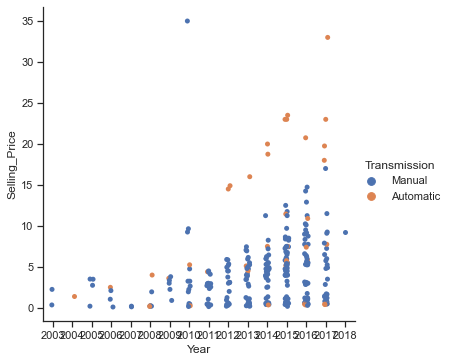

In [15]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Transmission", data=df)
plt.rcParams["xtick.labelsize"] = 10

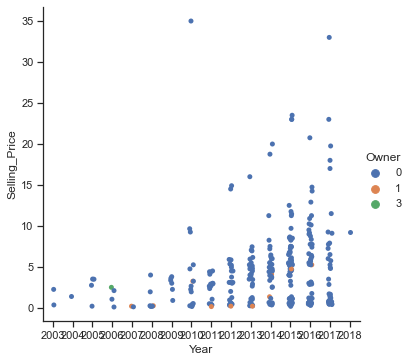

In [5]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Owner", data=df)
plt.rcParams["xtick.labelsize"] = 10

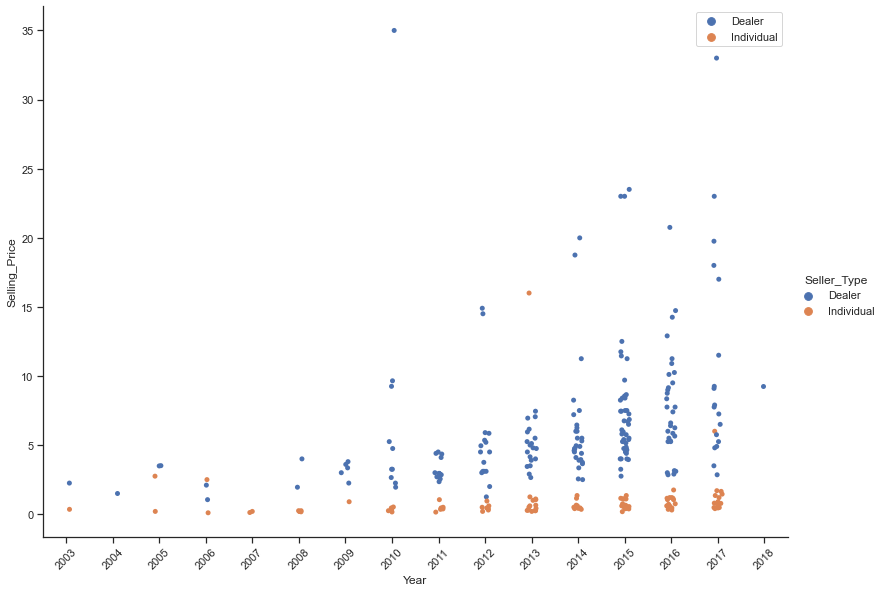

In [10]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Seller_Type", data=df,height=8, aspect=11/8)
g.set_xticklabels(rotation=45)
plt.legend()


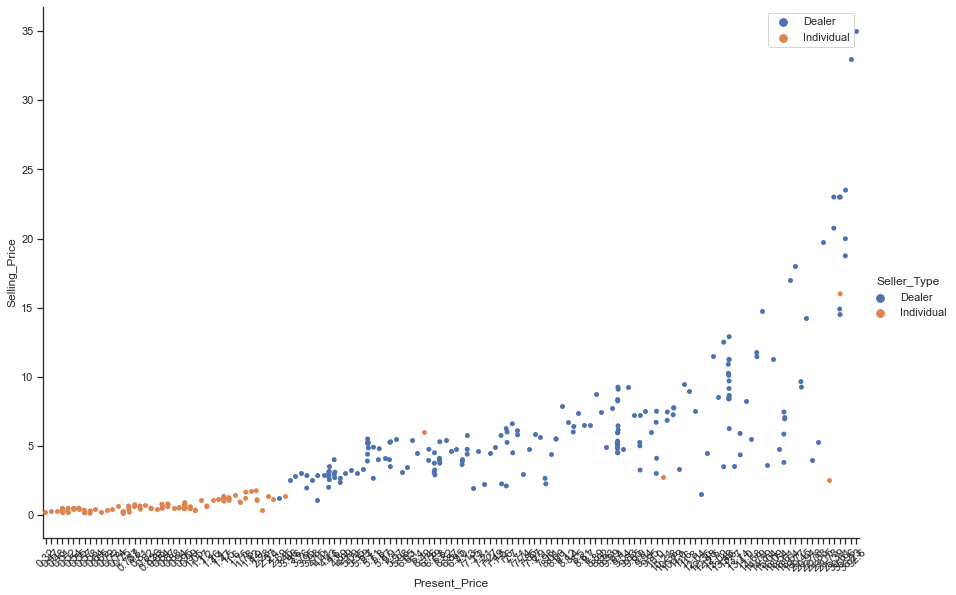

In [9]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Present_Price", y="Selling_Price", hue="Seller_Type", data=df, height=8, aspect=12/8)
g.set_xticklabels(rotation=45)
plt.legend()

# Quantitfication

# Matrice de correlation

<AxesSubplot:>

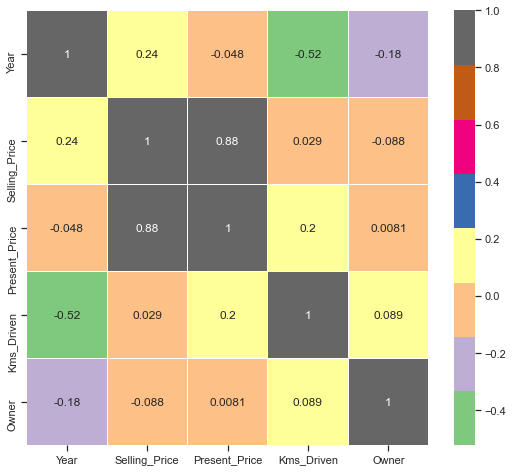

In [27]:
matrice_corr = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="Accent", linewidths = 0.1,annot=True)

# Régression linéaire univariée avec Scipy.

LinregressResult(slope=0.4150916946355396, intercept=-831.1789245913283, rvalue=0.2361409801604273, pvalue=3.495472434809122e-05, stderr=0.0987819729376285)
slope: 0.415092   intercept: -831.178925
R-squared: 0.055763


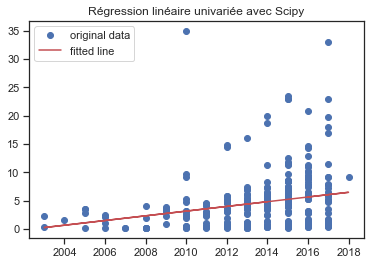

In [20]:
X = df.Year
y = df.Selling_Price
res = stats.linregress(df.Year, df.Selling_Price)
plt.plot(df.Year, df.Selling_Price, 'o', label='original data')
print(res)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f   intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(df.Year, res.intercept + res.slope*df.Year, 'r', label='fitted line')
plt.legend()
plt.title("Régression linéaire univariée avec Scipy")
plt.show()

In [62]:
tinv = lambda p, df: abs(norm.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
#print(f"intercept (95%): {res.intercept:.6f}"
#      f" +/- {ts*res.intercept_stderr:.6f}")

slope (95%): 0.415092 +/- 29.342201


# Régression linéaire univariée avec Numpy.

model =  [ 4.15091695e-01 -8.31178925e+02]
test predict year 2020 =  7.306298572461742
r2 score =  0.055762562511127545


Text(0.5, 1.0, 'Régression linéaire univariée avec Numpy')

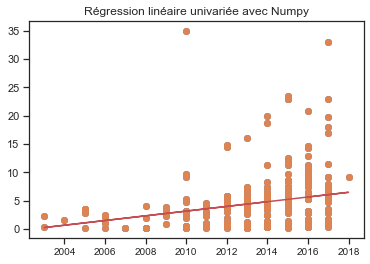

In [89]:
X = df.Year
y = df.Selling_Price
plt.scatter(X,y)
model = np.polyfit(X, y, 1)
print("model = ", model)
predict = np.poly1d(model)
test_year = 2020
print("test predict year 2020 = ", predict(test_year))
print("r2 score = ", r2_score(y, predict(x)))
x_lin_reg = X
y_lin_reg = predict(x_lin_reg)
plt.scatter(X, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title("Régression linéaire univariée avec Numpy")

# Régression linéaire univariée avec sklearn